<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Chef | Classification Models</h1>
Cohort 1 | Machine Learning</h4>
Jesal Panchal<br>
Hult International Business School<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
# importing libraries
import pandas as pd                      # data science essentials
import matplotlib.pyplot as plt          # data visualization
import seaborn as sns    # enhanced graphical output
import numpy as np
import statsmodels.formula.api as smf    # regression modeling
import random as rand                    # random number generation
from sklearn.model_selection import train_test_split # training and testing
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.neighbors import KNeighborsRegressor    # KNN for Regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
#import gender_guesser.detector as gender
import pydotplus                                     # interprets dot objects
from sklearn.tree import export_graphviz             # exports graphics
from IPython.display import Image                    # displays on frontend
from six import StringIO                             # saves objects in memory
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.metrics import make_scorer                    # customizable scorer
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier        # random forest
from sklearn.ensemble import GradientBoostingClassifier    # gbm

# setting random seed
rand.seed(a = 327)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(file)

# displaying the first five observations of the DataFrame
chef.head(n = 5)



,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [2]:
#checking for null values in chef dataset
chef.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [3]:
# instantiating an imputation value
fill = 'N/A'


# imputing 'FAMILY_NAME'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

# making sure all missing values have been taken care of
chef.isnull().any().any()

False

## Defining Functions

In [4]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):

    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    train_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        train_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, train_accuracy, label = "train accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
    PARAMETERS
    ----------
    true_y : true values for the response variable
    pred_y : predicted values for the response variable
    labels : default = None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [5]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

## Feature Engineering

In [6]:
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# renaming column to concatenate
email_df.columns = ['0' , 'email_domains']


# concatenating personal_email_domain with chef DataFrame
chef = pd.concat([chef, email_df['email_domains']],
                     axis = 1)


# printing value counts of personal_email_domain
chef.loc[: ,'email_domains'].value_counts()

# email domain types personal and professsional
personal_email_domains = ['@gmail.com', 
                          '@protonmail.com',
                          '@yahoo.com'] #icloud account

professional_email_domains  = [ '@amex.com', 
                        '@mcdonalds.com',
                        '@cocacola.com', 
                        '@jnj.com', 
                        '@merck.com',  
                        '@nike.com', 
                        '@apple.com',
                        '@ibm.com', 
                        '@dupont.com',    
                        '@ge.org',
                        '@microsoft.com', 
                        '@chevron.com',
                        '@unitedhealth.com',
                        '@exxon.com', 
                        '@travelers.com', 
                        '@boeing.com', 
                        '@verizon.com',
                        '@caterpillar.com',
                        '@mmm.com', 
                        '@pg.com', 
                        '@disney.com',
                        '@walmart.com',
                        '@pfizer.com', 
                        '@visa.com',
                        '@jpmorgan.com', 
                        '@unitedtech.com', 
                        '@cisco.com', 
                        '@goldmansacs.com', 
                        '@homedepot.com',
                        '@intel.com']

junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com',
                      '@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domains']:
    
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal_email')
        

    elif '@' + domain in professional_email_domains:
        placeholder_lst.append('professionl_email')

        
    elif'@' + domain in junk_email_domains:
        placeholder_lst.append('Junk')
    else:
        print('Unknown')

# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['domain_group'].value_counts()


personal_email       861
professionl_email    696
Junk                 389
Name: domain_group, dtype: int64

In [7]:
# get dummies for domain group
dummies = pd.get_dummies(chef['domain_group'])

# concatenating personal_email_domain with chef DataFrame
chef = pd.concat([chef, dummies],
                     axis = 1)

# converting the dummies to int64
chef['personal_email'] = np.int64(chef['personal_email'])
chef['professionl_email'] = np.int64(chef['professionl_email'])

In [8]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='num_of_names'):

    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))
        
#Dividing the 'NAME' column by num_of_names 
# calling text_split_feature
text_split_feature(col = 'NAME',
                   df  = chef)


# checking results
chef['num_of_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: num_of_names, dtype: int64

In [9]:
#####IMPORTANT section

# dummy variable for having a basement.
chef['has_mobile_login']   = 0
chef['has_late_deliveries']      = 0
chef['has_cancelled_before'] = 0
chef['has_cancelled_after']  = 0
chef['has_attended_master']= 0
chef['has_weekly_plan']    = 0

for index, value in chef.iterrows():

    
    # Mobile logins
    if chef.loc[index, 'MOBILE_LOGINS'] > 0:
        chef.loc[index, 'has_mobile_login'] = 1


    # Late Delivers
    if chef.loc[index, 'LATE_DELIVERIES'] > 0:
        chef.loc[index, 'has_late_deliveries'] = 1
        
    
     # Cancelled before noon
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        chef.loc[index, 'has_cancelled_before'] = 1
    
    # Cancelled after noon
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'has_cancelled_after'] = 1
        
    
    # MASTER_CLASSES_ATTENDED
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'has_attended_master'] = 1
        
    # WEEKLY_PLAN
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'has_weekly_plan'] = 1    
        
# checking results
chef[['has_mobile_login', 'has_late_deliveries', 'has_attended_master',
      'has_weekly_plan', 'has_cancelled_before', 'has_cancelled_after']].head(n  = 10)

,has_mobile_login,has_late_deliveries,has_attended_master,has_weekly_plan,has_cancelled_before,has_cancelled_after
0,1,1,0,0,1,1
1,1,1,0,1,0,0
2,1,1,0,1,1,0
3,1,1,0,1,1,0
4,1,1,1,1,0,0
5,1,1,1,0,1,0
6,1,1,0,1,1,0
7,1,0,0,1,0,0
8,1,1,0,1,0,0
9,1,1,1,1,0,0


In [10]:
#####IMPORTANT section - Featuring engineered

# log transforming Revenue, Avg Prep Time, Total Meals, Uni Meals, Ave time per site and PC Logins -> saving it to the dataset
chef['log_Revenue'] = np.log10(chef['REVENUE'])
chef['log_Avg_prep'] = np.log10(chef['AVG_PREP_VID_TIME']) #the distribution is normal
chef['log_Total_meals'] = np.log10(chef['TOTAL_MEALS_ORDERED']).round(2)
chef['log_Uni_meals'] = np.log10(chef['UNIQUE_MEALS_PURCH'])
chef['log_Avge_time_per_site']=  np.log10(chef['AVG_TIME_PER_SITE_VISIT'])
chef['log_PC_logins'] = np.log10(chef['PC_LOGINS'])  

# log total photos viewed
chef.loc[(chef['TOTAL_PHOTOS_VIEWED']==0), 'TOTAL_PHOTOS_VIEWED' ] = 0.01
chef['log_total_photos_viewed'] = np.log10(chef['TOTAL_PHOTOS_VIEWED']).round(2)



######

## The total delivery erros that occured
chef.loc[:,"delivery_errors"] = chef.loc[:,"EARLY_DELIVERIES"]+ chef.loc[:,"LATE_DELIVERIES"]

#the total percentage of delivery errors in the order 
chef.loc[:,"percentage_delivery_errors"] = (chef.loc[:,"EARLY_DELIVERIES"]+ 
                                            chef.loc[:,"LATE_DELIVERIES"])/chef.loc[:,"TOTAL_MEALS_ORDERED"].round(2)
                                 
chef['total_cancelled'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON']

## Ratio of customer care contact with number of orders
chef.loc[ : , "unhappy_customers"] = (chef.loc[:,"CONTACTS_W_CUSTOMER_SERVICE"]/

                                      chef.loc[:,"TOTAL_MEALS_ORDERED"]).round(2)
#Adding all the logins 
chef.loc[: ,'total_logins'] = chef.loc[: ,'MOBILE_LOGINS'] + chef.loc[: ,'PC_LOGINS']


#####

# the ratio of unique orders 
chef.loc[: , "unique_orders_ratio"] = (chef.loc[:,"TOTAL_MEALS_ORDERED"]/
                                   chef.loc[:,"UNIQUE_MEALS_PURCH"]).round(2)
# How many unique orders happened 
chef.loc[: , "re_unique_orders"] = (chef.loc[:,"TOTAL_MEALS_ORDERED"]-
                                   chef.loc[:,"UNIQUE_MEALS_PURCH"]).round(2)

chef['avg_price_per_order'] = chef['REVENUE']/chef['TOTAL_MEALS_ORDERED']

# checking results
chef[['log_Revenue', 'log_Avg_prep', 'log_Total_meals', 'log_Uni_meals', 'log_Avge_time_per_site', 'log_PC_logins',
     'log_total_photos_viewed', 'delivery_errors', 'percentage_delivery_errors', 'total_cancelled', 
      'unhappy_customers', 'total_logins', 'unique_orders_ratio', 'avg_price_per_order']].head()



,log_Revenue,log_Avg_prep,log_Total_meals,log_Uni_meals,log_Avge_time_per_site,log_PC_logins,log_total_photos_viewed,delivery_errors,percentage_delivery_errors,total_cancelled,unhappy_customers,total_logins,unique_orders_ratio,avg_price_per_order
0,2.594393,1.523746,1.15,0.778151,1.681241,0.698970,-2.00,2,0.142857,4,0.86,7,2.33,28.071429
1,3.135133,1.928396,1.94,0.477121,1.605844,0.698970,2.23,2,0.022989,0,0.09,6,29.00,15.689655
2,2.903090,1.799341,1.18,0.845098,1.296007,0.778151,-2.00,1,0.066667,3,0.73,7,2.14,53.333333
3,2.778151,1.641474,1.11,0.778151,1.954243,0.778151,-2.00,3,0.230769,2,0.85,7,2.17,46.153846
4,3.173186,1.928396,1.67,0.903090,1.606166,0.698970,2.31,8,0.170213,0,0.13,6,5.88,31.702128


In [11]:
# to see the stats of the new added variables in comparison to the orginial variables
chef.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,Junk,personal_email,professionl_email,num_of_names,has_mobile_login,has_late_deliveries,has_cancelled_before,has_cancelled_after,has_attended_master,has_weekly_plan,log_Revenue,log_Avg_prep,log_Total_meals,log_Uni_meals,log_Avge_time_per_site,log_PC_logins,log_total_photos_viewed,delivery_errors,percentage_delivery_errors,total_cancelled,unhappy_customers,total_logins,unique_orders_ratio,re_unique_orders,avg_price_per_order
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,0.604317,2.794964,13.508222,106.439568,0.199897,0.442446,0.357657,1.834532,0.991778,0.836074,0.657246,0.143371,0.521069,0.759507,3.270382,2.155557,1.765699,0.618819,1.944993,0.739172,-0.228823,4.456835,0.100406,1.570915,0.181804,6.992292,20.524630,69.729188,36.499092
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.641866,0.756528,2.333876,181.010678,0.400026,0.496804,0.479434,0.778476,0.090325,0.370304,0.474752,0.350541,0.499684,0.427493,0.211802,0.139008,0.315497,0.272617,0.218151,0.046356,2.121169,3.562362,0.138391,1.611130,0.235782,0.787069,19.056378,55.001567,19.363105
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,0.000000,1.000000,5.000000,0.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.117271,1.523746,1.040000,0.000000,1.014100,0.602060,-2.000000,0.000000,0.000000,0.000000,0.010000,5.000000,1.330000,3.000000,9.782609
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.010000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.130334,2.058426,1.590000,0.477121,1.857332,0.698970,-2.000000,2.000000,0.023155,0.000000,0.070000,6.000000,7.330000,34.000000,22.159699
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.010000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.240549,2.163161,1.780000,0.698970,1.973866,0.778151,-2.000000,4.000000,0.057623,1.000000,0.100000,7.000000,15.330000,55.000000,33.556548
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000,0.0000

In [12]:
#Create new columns
chef['below_median']        = 0
chef['unique_preferences']  = 0

for index, val in chef.iterrows():


    if chef.loc[index, 'MEDIAN_MEAL_RATING'] <= 3 and\
    chef.loc[index, 'avg_price_per_order'] > 34:
        chef.loc[index, 'below_median'] = 1
        
    if chef.loc[index, 'UNIQUE_MEALS_PURCH'] > 5 and \
    chef.loc[index, 'TASTES_AND_PREFERENCES'] == 1:
        chef.loc[index, 'unique_preferences'] = 1



In [13]:
# dropping categorical variables to prepare modeling
# preparing explanatory variable data
chef_data  = chef.drop(['NAME','EMAIL', 'FIRST_NAME', 'FAMILY_NAME','email_domains', 
                        'domain_group'],
                                axis = 1)

#have to drop the x variables that you log

In [14]:
#checking to see if all the variables are int64 or float 64 otherwise it will cause an error
chef_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 3   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 4   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 5   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 6   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 7   MOBILE_NUMBER                1946 non-null   int64  
 8   CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 9   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 10  TASTES_AND_PREFERENCES       1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

In [15]:
#correlation with cross_sell_sucess
df_corr = chef_data.corr().round(2)
df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
professionl_email              0.19
CANCELLATIONS_BEFORE_NOON      0.16
num_of_names                   0.16
total_cancelled                0.14
has_cancelled_before           0.14
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
unique_preferences             0.06
has_attended_master            0.05
log_PC_logins                  0.05
CONTACTS_W_CUSTOMER_SERVICE    0.04
PC_LOGINS                      0.04
PACKAGE_LOCKER                 0.04
MASTER_CLASSES_ATTENDED        0.04
personal_email                 0.04
log_Avg_prep                   0.03
AVG_PREP_VID_TIME              0.03
MEDIAN_MEAL_RATING             0.03
EARLY_DELIVERIES               0.02
log_Total_meals                0.02
LARGEST_ORDER_SIZE             0.02
log_Avge_time_per_site         0.02
AVG_TIME_PER_SITE_VISIT        0.01
LATE_DELIVERIES                0.01
log_Revenue                    0.01
log_total_photos_viewed     

# Modeling

In [16]:
# declaring explanatory variables
chef_data = chef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



## Dictionary 

In [17]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['TOTAL_MEALS_ORDERED',  
                   'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
                    'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                   'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
                   'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                   'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'Junk', 'personal_email', 
                   'professionl_email', 'log_Revenue', 'total_cancelled',
                   'log_Avg_prep', 'log_Uni_meals',  'log_Avge_time_per_site', 
                  'log_PC_logins', 're_unique_orders', 'unhappy_customers', 
                   'unique_preferences','num_of_names','unique_orders_ratio','below_median', 
                  'percentage_delivery_errors','delivery_errors','has_weekly_plan', 'has_weekly_plan', 'has_cancelled_after'], 
                

    
 # significant variables only (set 1) # 0.7143
 'logit_sig'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
                   'TASTES_AND_PREFERENCES','REFRIGERATED_LOCKER',
                   'has_cancelled_before','Junk', 'professionl_email', 
                   'log_Avg_prep', 'EARLY_DELIVERIES','has_attended_master',
                   'percentage_delivery_errors','num_of_names', 'log_PC_logins'], 
   
    #PC_LOGINS, 'below_median', log_revenue or Revenue
    
 #.6545 
 'logit_sig2'   : ['REFRIGERATED_LOCKER', 'WEEKLY_PLAN','CANCELLATIONS_BEFORE_NOON',
                   'AVG_CLICKS_PER_VISIT', 'TOTAL_MEALS_ORDERED', 'PRODUCT_CATEGORIES_VIEWED',
                   'CONTACTS_W_CUSTOMER_SERVICE', 'LATE_DELIVERIES', 'MOBILE_NUMBER',
                   'LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED', 're_unique_orders', 
                   'avg_price_per_order', 'log_Uni_meals', 'log_total_photos_viewed',
                   'has_attended_master', 'log_Revenue', 'log_Avg_prep', 'unique_orders_ratio',
                    'num_of_names','unhappy_customers','Junk','professionl_email']
}

 # 'LARGEST_ORDER_SIZE'

In [18]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


Significant p-value Model:
--------------------------
{candidate_dict['logit_sig']}

""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['TOTAL_MEALS_ORDERED', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'Junk', 'personal_email', 'professionl_email', 'log_Revenue', 'total_cancelled', 'log_Avg_prep', 'log_Uni_meals', 'log_Avge_time_per_site', 'log_PC_logins', 're_unique_orders', 'unhappy_customers', 'unique_preferences', 'num_of_names', 'unique_orders_ratio', 'below_median', 'percentage_delivery_errors', 'delivery_errors', 'has_weekly_plan', 'has_weekly_plan', 'has_cancelled_after']


Significant p-value Model:
--------------------------
['MOBILE_NUMBER', 'CANCELLATIONS

## Logistic Regression 

In [19]:
# instantiating a best logistic regression model object # cancellation was better
logistic_best = smf.logit(formula   = "CROSS_SELL_SUCCESS ~ CANCELLATIONS_BEFORE_NOON",
                           data = chef_train)


# FITTING the model object
results_logistic = logistic_best.fit()


# checking the results SUMMARY
results_logistic.summary

Optimization terminated successfully.
         Current function value: 0.614811
         Iterations 5


<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x7fc0ef718220>>

In [20]:
# instantiating a full logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ CANCELLATIONS_BEFORE_NOON+
                                                             TOTAL_MEALS_ORDERED +
                                                             professionl_email+
                                                             num_of_names+
                                                             MOBILE_NUMBER+
                                                             REFRIGERATED_LOCKER +
                                                             unique_preferences+
                                                             log_PC_logins+
                                                             CONTACTS_W_CUSTOMER_SERVICE + 
                                                             has_attended_master +
                                                             TASTES_AND_PREFERENCES + 
                                                             log_Avg_prep+
                                                             MOBILE_LOGINS + 
                                                             WEEKLY_PLAN + 
                                                             EARLY_DELIVERIES + 
                                                             LARGEST_ORDER_SIZE +
                                                             log_Avge_time_per_site +
                                                             has_cancelled_before+
                                                             avg_price_per_order+
                                                             re_unique_orders+
                                                             MEDIAN_MEAL_RATING + 
                                                             Junk
                                                             
                                                                    """,data = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()



Optimization terminated successfully.
         Current function value: 0.533181
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           22
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                  0.1509
Time:                        17:53:34   Log-Likelihood:                -777.91
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 6.687e-46
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -6.2075      2.005     -3.096      0.002     -10.138      -2.277
CANCELLATIONS_BEFORE_NOON       0.2471      0.064      3.846      0.000       0.121       0.373
TOTAL_MEALS_ORDERED            -0.0790      0.036     -2.166      0.030      -0.151      -0.008
professionl_email               0.6028      0.146      4.126      0.000       0.317       0.889
num_of_names                    0.5496      0.095      5.793      0.000       0.364       0.736
MOBILE_NUMBER                   0.8873      0.179      4.945      0.000       0.536       1.239
REFRIGERATED_LOCKER             0.5134      0.211      2.428      0.015       0.099       0.928
unique_preferences              0.5329      0.214      2.485      0.013       0.113       0.953
log_PC_logins                   3.0463      1.363      2.236      0.025       0.376       5.717
CONTACTS_W_CUSTOMER_SERVICE     0.0917      0.033      2.804      0.005       0.028       0.156
has_attended_master             0.2467      0.147      1.680      0.093      -0.041       0.534
TASTES_AND_PREFERENCES          0.1721      0.161      1.069      0.285      -0.144       0.488
log_Avg_prep                    1.1526      0.886      1.301      0.193      -0.584       2.890
MOBILE_LOGINS                  -0.1873      0.119     -1.579      0.114      -0.420       0.045
WEEKLY_PLAN                     0.0055      0.005      1.152      0.249      -0.004       0.015
EARLY_DELIVERIES                0.0629      0.028      2.256      0.024       0.008       0.118
LARGEST_ORDER_SIZE             -0.0614      0.071     -0.868      0.386      -0.200       0.077
log_Avge_time_per_site          0.1580      0.311      0.508      0.612      -0.452       0.768
has_cancelled_before            0.1333      0.177      0.751      0.453      -0.215       0.481
avg_price_per_order            -0.0122      0.005     -2.603      0.009      -0.021      -0.003
re_unique_orders                0.0751      0.036      2.062      0.039       0.004       0.147
MEDIAN_MEAL_RATING              0.1079      0.103      1.052      0.293      -0.093       0.309
Junk                           -1.3567      0.160     -8.479      0.000      -1.670      -1.043
===============================================================================================
"""

In [21]:
# instantiating a logistic regression model object
logistic_sig = smf.logit(formula = """  CROSS_SELL_SUCCESS ~ TOTAL_MEALS_ORDERED +
                                                            CONTACTS_W_CUSTOMER_SERVICE +
                                                            PRODUCT_CATEGORIES_VIEWED +
                                                            CANCELLATIONS_BEFORE_NOON +
                                                            TASTES_AND_PREFERENCES +
                                                            MOBILE_LOGINS +
                                                            WEEKLY_PLAN +
                                                            EARLY_DELIVERIES +
                                                            REFRIGERATED_LOCKER +
                                                            LARGEST_ORDER_SIZE +
                                                            MASTER_CLASSES_ATTENDED +
                                                            MEDIAN_MEAL_RATING +
                                                            AVG_CLICKS_PER_VISIT +
                                                            total_logins +
                                                            has_attended_master +
                                                            has_weekly_plan +
                                                            professionl_email +
                                                            delivery_errors +
                                                            percentage_delivery_errors +
                                                            total_cancelled +
                                                            num_of_names+
                                                            log_total_photos_viewed """,
                                                                                        data    = chef_train)


#'TOTAL_MEALS_ORDERED','MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
 #                  'TASTES_AND_PREFERENCES','REFRIGERATED_LOCKER',
  #                 'has_cancelled_before','personal_email', 'professionl_email', 
   #                'log_Avg_prep', 'EARLY_DELIVERIES','has_attended_master','delivery_errors',
    #               'percentage_delivery_errors','num_of_names', 'total_cancelled'
                
# fitting the model object
results_full2 = logistic_sig.fit()


# checking the results SUMMARY
results_full2.summary()

Optimization terminated successfully.
         Current function value: 0.569103
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           22
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                 0.09373
Time:                        17:53:34   Log-Likelihood:                -830.32
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 3.449e-25
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.9821      1.314     -2.269      0.023      -5.558      -0.406
TOTAL_MEALS_ORDERED            -0.0012      0.001     -0.890      0.374      -0.004       0.001
CONTACTS_W_CUSTOMER_SERVICE     0.0379      0.029      1.285      0.199      -0.020       0.096
PRODUCT_CATEGORIES_VIEWED      -0.0130      0.020     -0.662      0.508      -0.052       0.026
CANCELLATIONS_BEFORE_NOON       0.5237      0.144      3.634      0.000       0.241       0.806
TASTES_AND_PREFERENCES          0.3444      0.132      2.611      0.009       0.086       0.603
MOBILE_LOGINS                  -0.3689      0.156     -2.371      0.018      -0.674      -0.064
WEEKLY_PLAN                     0.0062      0.005      1.212      0.225      -0.004       0.016
EARLY_DELIVERIES                0.0340      0.034      1.010      0.313      -0.032       0.100
REFRIGERATED_LOCKER             0.5242      0.204      2.568      0.010       0.124       0.924
LARGEST_ORDER_SIZE              0.0085      0.045      0.191      0.848      -0.079       0.096
MASTER_CLASSES_ATTENDED         0.0205      0.219      0.094      0.925      -0.409       0.450
MEDIAN_MEAL_RATING              0.1762      0.161      1.092      0.275      -0.140       0.493
AVG_CLICKS_PER_VISIT            0.0124      0.049      0.251      0.802      -0.085       0.109
total_logins                    0.2031      0.104      1.954      0.051      -0.001       0.407
has_attended_master             0.2189      0.285      0.769      0.442      -0.339       0.777
has_weekly_plan                -0.1134      0.158     -0.718      0.473      -0.423       0.196
professionl_email               1.0111      0.133      7.629      0.000       0.751       1.271
delivery_errors                 0.0191      0.027      0.696      0.487      -0.035       0.073
percentage_delivery_errors     -0.1921      0.703     -0.273      0.785      -1.570       1.186
total_cancelled                -0.2585      0.135     -1.913      0.056      -0.523       0.006
num_of_names                    0.5187      0.091      5.702      0.000       0.340       0.697
log_total_photos_viewed         0.0051      0.031      0.161      0.872      -0.057       0.067
===============================================================================================
"""

In [22]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig2']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            warm_start = False,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY  :', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY  :', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap     :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)


print('LogReg Tree AUC Score     :', roc_auc_score(y_true  = y_test,
                                            y_score = logreg_pred).round(4))

# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)


LogReg Training ACCURACY  : 0.7423
LogReg Testing  ACCURACY  : 0.7515
LogReg Train-Test Gap     : 0.0092
LogReg Tree AUC Score     : 0.6545


/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# zipping each feature name to its coefficient
logreg_model_values = zip(chef[candidate_dict['logit_sig2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)

#logreg_model_lst.sort()

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.01)
('REFRIGERATED_LOCKER', 0.17)
('WEEKLY_PLAN', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.27)
('AVG_CLICKS_PER_VISIT', -0.07)
('TOTAL_MEALS_ORDERED', -0.04)
('PRODUCT_CATEGORIES_VIEWED', -0.03)
('CONTACTS_W_CUSTOMER_SERVICE', 0.09)
('LATE_DELIVERIES', 0.01)
('MOBILE_NUMBER', 0.36)
('LARGEST_ORDER_SIZE', -0.03)
('MASTER_CLASSES_ATTENDED', 0.15)
('re_unique_orders', 0.04)
('avg_price_per_order', -0.01)
('log_Uni_meals', -0.01)
('log_total_photos_viewed', 0.02)
('has_attended_master', 0.16)
('log_Revenue', 0.06)
('log_Avg_prep', 0.04)
('unique_orders_ratio', -0.0)
('num_of_names', 0.65)
('unhappy_customers', -0.03)
('Junk', -0.94)
('professionl_email', 0.69)


In [24]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 60
False Positives: 96
False Negatives: 25
True Positives : 306



## Decision Tree

In [25]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)

# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy

# SCORING the model
print('Tree Training ACCURACY     :', pruned_tree_fit.score(x_train, y_train).round(4))
print('Tree Testing  ACCURACY     :', pruned_tree_fit.score(x_test, y_test).round(4))


# displaying and saving the gap between training and testing
print('Tree Train-Test Gap        :', abs(pruned_tree_train_score - pruned_tree_test_score).round(4))
Prune_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(4)


print('Tree AUC Score             :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))
# saving auc score
pruned_tree_auc_score = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc



Tree Training ACCURACY     : 0.7539
Tree Testing  ACCURACY     : 0.7618
Tree Train-Test Gap        : 0.0079
Tree AUC Score             : 0.6757


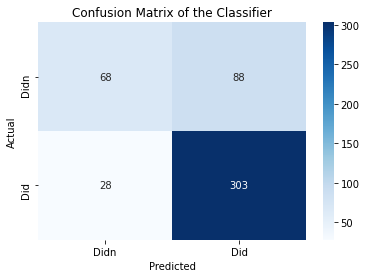

In [26]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = pruned_tree_pred,
          labels = ['Didn', 'Did'])

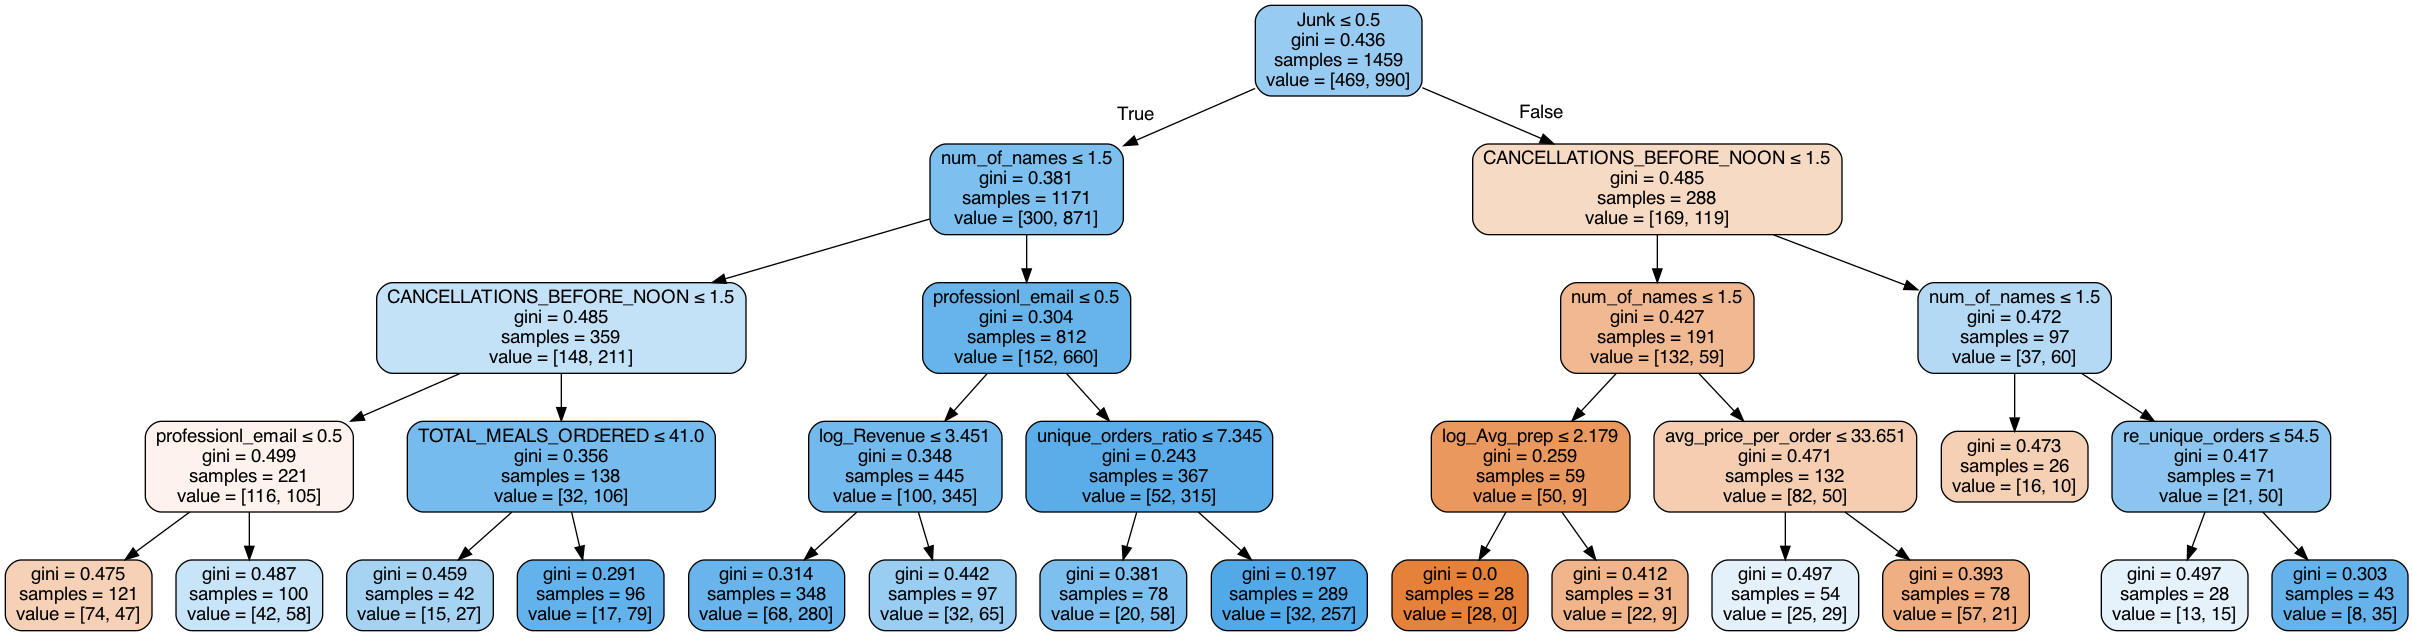

In [27]:
# calling display_tree
display_tree(tree       = pruned_tree,
             feature_df = chef_data)

<ipython-input-5-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


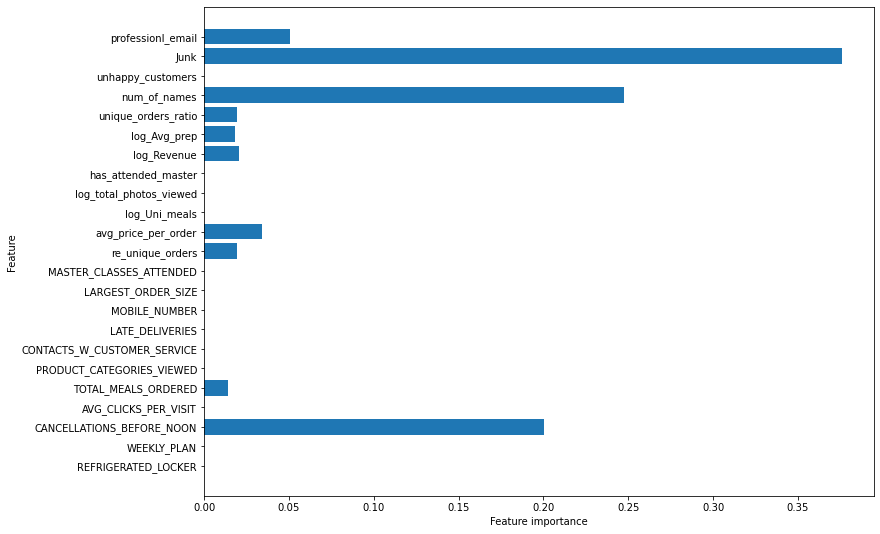

In [28]:
# plotting feature importance
plot_feature_importances(pruned_tree,
                         train  = chef_data,
                         export = False)

In [29]:
labels = chef_data.columns.tolist()

for feature in zip(labels, pruned_tree_fit.feature_importances_):
    print(feature)

('REFRIGERATED_LOCKER', 0.0)
('WEEKLY_PLAN', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.2002359542989779)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_MEALS_ORDERED', 0.014090224389485352)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('LATE_DELIVERIES', 0.0)
('MOBILE_NUMBER', 0.0)
('LARGEST_ORDER_SIZE', 0.0)
('MASTER_CLASSES_ATTENDED', 0.0)
('re_unique_orders', 0.019527608352986496)
('avg_price_per_order', 0.034040833345337675)
('log_Uni_meals', 0.0)
('log_total_photos_viewed', 0.0)
('has_attended_master', 0.0)
('log_Revenue', 0.02041009350434467)
('log_Avg_prep', 0.018444786074162025)
('unique_orders_ratio', 0.019390636497252853)
('num_of_names', 0.247526247566981)
('unhappy_customers', 0.0)
('Junk', 0.3758214361357859)
('professionl_email', 0.05051217983468597)


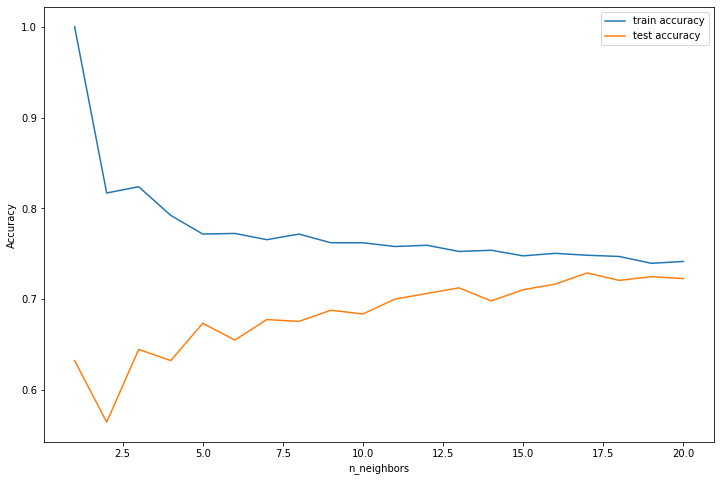

The optimal number of neighbors is: 17


In [30]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = chef_data,
                                  y_data        = chef_target,
                                  response_type = 'class')

In [31]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            chef_target,
            random_state = 219,
            test_size = 0.25,
            stratify = chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# SCORING the results
print('KNN Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('KNN Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap  :', abs(knn_train_score - knn_test_score).round(4))
KNN_test_gap = abs(knn_train_score - knn_test_score).round(4)

print('KNN AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))



# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

KNN Training ACCURACY: 0.7354
KNN Testing  ACCURACY: 0.7125
KNN Train-Test Gap  : 0.0229
KNN AUC Score        : 0.5886


In [32]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 38
False Positives: 118
False Negatives: 22
True Positives : 309



In [33]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
KNN Tree      {knn_auc_score}         {knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, knn_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, knn_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, knn_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
#model_performance.to_excel('./model_results/classification_model_performance.xlsx',
#                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6545         (60, 96, 25, 306)
KNN Tree      0.5886         (38, 118, 22, 309)
Pruned Tree   0.6757         (68, 88, 28, 303)



# Hyperparameters Space

## Tuning for LR

In [ ]:
########################################
# RandomizedSearchCV
########################################

#declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [False]
solver_space     = ['newton-cg']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))



##############################################################################
# The output for the above following code will be:
#
# Tuned Parameters  : {'warm_start': False, 'solver': 'newton-cg', 'C': 4.0}
# Tuned CV AUC      : 0.6378
##############################################################################

In [34]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(random_state = 219, 
                              max_iter     = 1000,
                              C            = 4.0,
                              warm_start   = False,
                              solver       = 'newton-cg')


# FIT step is not needed
lr_tuned.fit(chef_data, chef_target)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7354
LR Tuned Testing  ACCURACY: 0.7392
LR Tuned AUC Score        : 0.6438


In [35]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 59
False Positives: 97
False Negatives: 30
True Positives : 301



In [36]:
# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_tuned_train_score,
                           'Testing Accuracy'  : lr_tuned_test_score,
                           'AUC Score'         : lr_tuned_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6545,0.7423,0.7515,"(60, 96, 25, 306)"
1,Full Tree,0.5886,0.7354,0.7125,"(38, 118, 22, 309)"
2,Pruned Tree,0.6757,0.7539,0.7618,"(68, 88, 28, 303)"
3,Tuned LR,0.6438,0.7354,0.7392,"(59, 97, 30, 301)"


## Tuninig for Tree

In [ ]:
#help(DecisionTreeClassifier)

In [ ]:
# building a model based on hyperparameter tuning results
# declaring a hyperparameter space
criterion_space = ['gini']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(3)
leaf_space      = pd.np.arange(15, 17, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 30,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))


##############################################################################
# The output for the above following code will be:
#
# Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 16, 'max_depth': 1, 'criterion': 'gini'}
# Tuned Training AUC: 0.7032
##############################################################################

In [37]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(random_state = 219, min_samples_leaf = 16,
                                    max_depth = 3, criterion = 'gini', 
                                    splitter = 'best')

# FIT step is not needed
tree_tuned.fit(chef_data, chef_target)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# SCORING the results
print('Training ACCURACY    :', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY    :', tree_tuned.score(x_test, y_test).round(4))

# displaying and saving the gap between training and testing
print('Tree Train-Test Gap  :', abs(tree_tuned_train_score - tree_tuned_test_score).round(4))
Tree_tuned_test_gap = abs(tree_tuned_train_score - tree_tuned_test_score).round(4)

print('AUC Score            :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY    : 0.7402
Testing  ACCURACY    : 0.7762
Tree Train-Test Gap  : 0.036
AUC Score            : 0.732


In [38]:
# unpacking the confusion matrix
tree_tuned_tn, \
tree_tuned_fp, \
tree_tuned_fn, \
tree_tuned_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tree_tuned_tn}
False Positives: {tree_tuned_fp}
False Negatives: {tree_tuned_fn}
True Positives : {tree_tuned_tp}
""")


True Negatives : 95
False Positives: 61
False Negatives: 48
True Positives : 283



<ipython-input-5-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


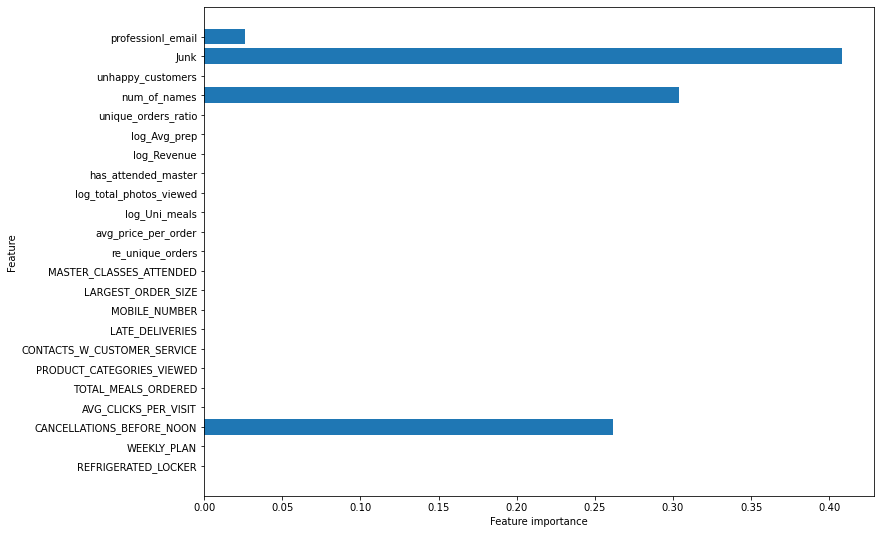

In [39]:
# plotting feature importance
plot_feature_importances(tree_tuned,
                         train  = chef_data,
                         export = False)

In [40]:
# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_tuned_train_score,
                           'Testing Accuracy'  : tree_tuned_test_score,
                           'AUC Score'         : tree_tuned_auc,
                           'Confusion Matrix'  :  (tree_tuned_tn,
                                                    tree_tuned_fp,
                                                    tree_tuned_fn,
                                                    tree_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6545,0.7423,0.7515,"(60, 96, 25, 306)"
1,Full Tree,0.5886,0.7354,0.7125,"(38, 118, 22, 309)"
2,Pruned Tree,0.6757,0.7539,0.7618,"(68, 88, 28, 303)"
3,Tuned LR,0.6438,0.7354,0.7392,"(59, 97, 30, 301)"
4,Tuned Tree,0.7320,0.7402,0.7762,"(95, 61, 48, 283)"


# RandomForest Classifier

In [41]:
# train/test split with the logit_sig variables
chef_data   =  chef.loc[ : , candidate_dict['logit_full']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

In [42]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 200,
                                    criterion        = 'gini',
                                    max_depth        = 4,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY    :', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY    :', rf_default_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
rf_train_score = rf_default.score(x_train, y_train).round(4) # accuracy
rf_test_score  = rf_default.score(x_test, y_test).round(4)   # accuracy

# displaying and saving the gap between training and testing
print('Tree Train-Test Gap  :', abs(rf_train_score - rf_test_score).round(4))
rf_test_gap = abs(rf_train_score - rf_test_score).round(4)

# saving AUC score
print('AUC Score            :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY    : 0.7409
Testing  ACCURACY    : 0.7228
Tree Train-Test Gap  : 0.0181
AUC Score            : 0.5792


In [43]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 28
False Positives: 128
False Negatives: 7
True Positives : 324



In [44]:
labels = chef_data.columns.tolist()

for feature in zip(labels, rf_default_fit.feature_importances_):
    print(feature)

('TOTAL_MEALS_ORDERED', 0.03016114500750671)
('CONTACTS_W_CUSTOMER_SERVICE', 0.017061855915140322)
('PRODUCT_CATEGORIES_VIEWED', 0.008417771108636878)
('MOBILE_NUMBER', 0.02060510575661255)
('CANCELLATIONS_BEFORE_NOON', 0.07635565398101397)
('CANCELLATIONS_AFTER_NOON', 0.006192321487936373)
('TASTES_AND_PREFERENCES', 0.00532354715723578)
('MOBILE_LOGINS', 0.00919639899164305)
('WEEKLY_PLAN', 0.014355922875264665)
('EARLY_DELIVERIES', 0.005740825010818073)
('LATE_DELIVERIES', 0.013109484572388329)
('PACKAGE_LOCKER', 0.0038353159072267895)
('REFRIGERATED_LOCKER', 0.006684158873767186)
('LARGEST_ORDER_SIZE', 0.009931629816258168)
('MASTER_CLASSES_ATTENDED', 0.008024802769238094)
('MEDIAN_MEAL_RATING', 0.008212785656831686)
('AVG_CLICKS_PER_VISIT', 0.02407026416604398)
('TOTAL_PHOTOS_VIEWED', 0.01353662438716241)
('Junk', 0.22320707692689756)
('personal_email', 0.01666300682689075)
('professionl_email', 0.06424790377433481)
('log_Revenue', 0.030783578941746225)
('total_cancelled', 0.034850

## Hyperparameter Tuning

In [ ]:
#help(RandomForestClassifier)

In [45]:
#FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(1000, 1100, 1) #pd.np.arange(100, 1100, 1)
leaf_space       = pd.np.arange(1, 2, 1)      #pd.np.arange(1,25,1)
depth_space      = pd.np.arange(8)             #pd.np.arange(3,6,8)
criterion_space  = ['entropy']                 #['entropy', 'gini']
bootstrap_space  = [False]                     #[True, False]
warm_start_space = [False]                      #[True, False]
min_samples_split= pd.np.arange(2,3,1)

# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space,
              'max_depth'        : depth_space,
              'min_samples_split': min_samples_split
              }


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv                  = 3,
                               n_iter              = 30,
                               random_state        = 219,
                               scoring             = make_scorer(roc_auc_score,
                                                     needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


#printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))


##### Output: Tuned Parameters  : {'warm_start': False, 'n_estimators': 1057,
    # 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': False}
#Tuned Training AUC: 0.6308

<ipython-input-45-dec719b711de>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space  = pd.np.arange(1000, 1100, 1) #pd.np.arange(100, 1100, 1)
<ipython-input-45-dec719b711de>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space       = pd.np.arange(1, 2, 1)      #pd.np.arange(1,25,1)
<ipython-input-45-dec719b711de>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space      = pd.np.arange(8)             #pd.np.arange(3,6,8)
<ipython-input-45-dec719b711de>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  min_samples_split= pd.np.arange(2,3,1)
/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/sklearn/mo

/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", 

/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", 

Tuned Parameters  : {'warm_start': False, 'n_estimators': 1060, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': False}
Tuned Training AUC: 0.6304


In [46]:
# building a model based on hyperparameter tuning results
forest_tuned = forest_cv.best_estimator_


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned.predict(x_test)

# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))


print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy

# displaying and saving the gap between training and testing
print('Tree Train-Test Gap           :', abs(forest_tuned_train_score - forest_tuned_test_score).round(4))
Tree_tuned_test_gap = abs(forest_tuned_train_score - forest_tuned_test_score).round(4)


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.841
Forest Tuned Testing  ACCURACY: 0.8542
Forest Tuned AUC Score        : 0.7809
Tree Train-Test Gap           : 0.0132


<ipython-input-5-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


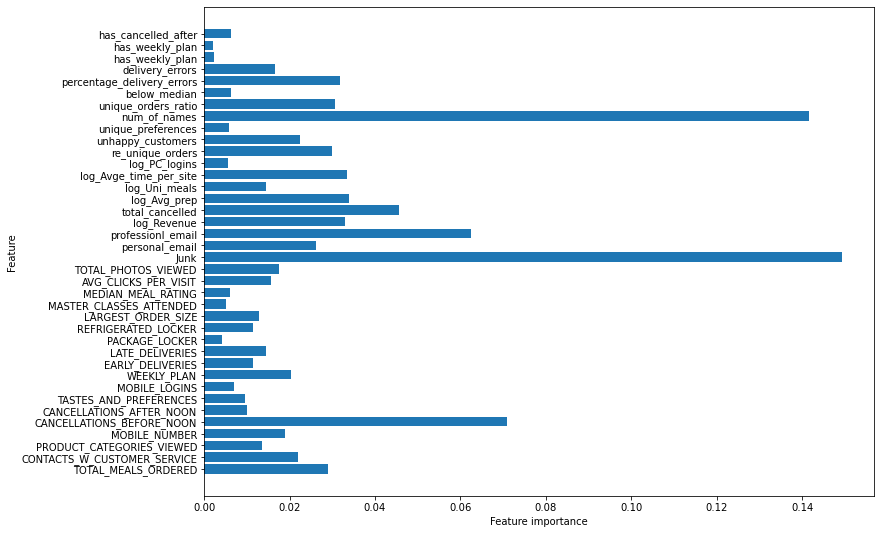

In [47]:
# plotting feature importances
plot_feature_importances(forest_tuned,
                         train = x_train,
                         export = False)

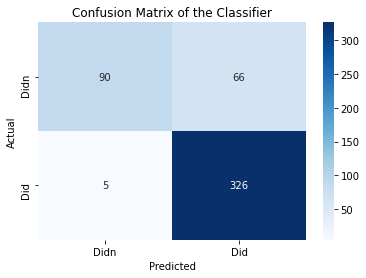

In [48]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()

# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = forest_tuned_pred,
          labels = ['Didn', 'Did'])

In [49]:
# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : forest_tuned_train_score,
                           'Testing Accuracy'   : forest_tuned_test_score,
                           'AUC Score'          : forest_tuned_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                    tuned_rf_fp,
                                                    tuned_rf_fn,
                                                    tuned_rf_tp)},
                          ignore_index = True)


# checking the results
print(model_performance)

                   Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0                    Logistic     0.6545             0.7423            0.7515   (60, 96, 25, 306)
1                   Full Tree     0.5886             0.7354            0.7125  (38, 118, 22, 309)
2                 Pruned Tree     0.6757             0.7539            0.7618   (68, 88, 28, 303)
3                    Tuned LR     0.6438             0.7354            0.7392   (59, 97, 30, 301)
4                  Tuned Tree     0.7320             0.7402            0.7762   (95, 61, 48, 283)
5  Tuned Random Forest (Full)     0.7809             0.8410            0.8542    (90, 66, 5, 326)


# GMB

In [50]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = .1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False, #keep it false
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8485
Testing ACCURACY : 0.7577
AUC Score        : 0.6726


In [51]:
# declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 0.4, 0.2)
estimator_space    = pd.np.arange(100, 110, 25)
depth_space        = pd.np.arange(4, 9, 1)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 30,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

<ipython-input-51-3ef0e9407d03>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  learn_space        = pd.np.arange(0.1, 0.4, 0.2)
<ipython-input-51-3ef0e9407d03>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space    = pd.np.arange(100, 110, 25)
<ipython-input-51-3ef0e9407d03>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space        = pd.np.arange(4, 9, 1)
/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
Tuned Training AUC: 0.6342


In [52]:
# checking the best estimator for the model
gbm_tuned = full_gbm_cv.best_estimator_

# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

gbm_tuned_train_score = gbm_tuned.score(x_train, y_train).round(4)
gbm_tuned_train_score = gbm_tuned.score(x_test, y_test).round(4)
gbm_roc_auc_score = roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4)

Training ACCURACY: 0.8869
Testing  ACCURACY: 0.9035
AUC Score        : 0.8612


In [53]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 116
False Positives: 40
False Negatives: 7
True Positives : 324



# Comparing Results

In [54]:
# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'GBM (Full) (Final)',
                           'Training Accuracy'  : gbm_tuned_train_score,
                           'Testing Accuracy'   : gbm_tuned_train_score,
                           'AUC Score'          : gbm_roc_auc_score,
                           'Confusion Matrix'   : (gbm_tuned_tn, 
gbm_tuned_fp, 
gbm_tuned_fn, 
gbm_tuned_tp) },
                          ignore_index = True)


# checking the results
print(model_performance)

                   Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0                    Logistic     0.6545             0.7423            0.7515   (60, 96, 25, 306)
1                   Full Tree     0.5886             0.7354            0.7125  (38, 118, 22, 309)
2                 Pruned Tree     0.6757             0.7539            0.7618   (68, 88, 28, 303)
3                    Tuned LR     0.6438             0.7354            0.7392   (59, 97, 30, 301)
4                  Tuned Tree     0.7320             0.7402            0.7762   (95, 61, 48, 283)
5  Tuned Random Forest (Full)     0.7809             0.8410            0.8542    (90, 66, 5, 326)
6          GBM (Full) (Final)     0.8612             0.9035            0.9035   (116, 40, 7, 324)


In [55]:
import time
start_time = time.time()


#coding
print("---%s seconds---"%(time.time() - start_time))

---8.988380432128906e-05 seconds---
